In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv
from itertools import izip

In [142]:
# load the dataset
dataframe = pd.read_csv('prices2.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [143]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [144]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(191, 95)


In [145]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [146]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [147]:
def reshape_data(data)
    # reshape input to be [samples, time steps, features]
    data = numpy.reshape(data, (data.shape[0], 1, data.shape[1]))
    return data

In [148]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

trainX = reshape_data(trainX)
testX = reshape_data(testX)
model.fit(trainX, trainY, nb_epoch=20, batch_size=1, verbose=2)

Epoch 1/20
3s - loss: 0.0600
Epoch 2/20
2s - loss: 0.0127
Epoch 3/20
2s - loss: 0.0125
Epoch 4/20
1s - loss: 0.0123
Epoch 5/20
1s - loss: 0.0121
Epoch 6/20
3s - loss: 0.0119
Epoch 7/20
3s - loss: 0.0119
Epoch 8/20
1s - loss: 0.0117
Epoch 9/20
1s - loss: 0.0115
Epoch 10/20
1s - loss: 0.0114
Epoch 11/20
2s - loss: 0.0114
Epoch 12/20
2s - loss: 0.0112
Epoch 13/20
2s - loss: 0.0114
Epoch 14/20
2s - loss: 0.0110
Epoch 15/20
2s - loss: 0.0110
Epoch 16/20
2s - loss: 0.0108
Epoch 17/20
1s - loss: 0.0108
Epoch 18/20
1s - loss: 0.0106
Epoch 19/20
1s - loss: 0.0107
Epoch 20/20
1s - loss: 0.0105


In [149]:
# make predictions
trainPredict = model.predict(trainX, batch_size=10)
testPredict = model.predict(testX, batch_size=10)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [150]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.01 RMSE
Test Score: 1.20 RMSE


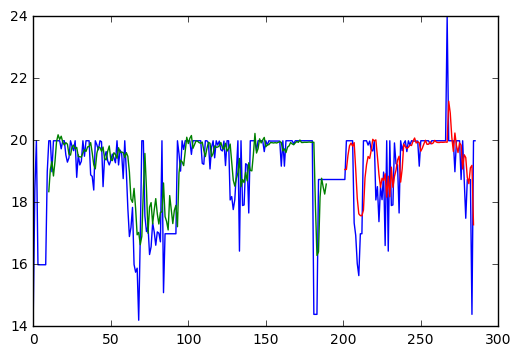

In [151]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        tmp1 = dataset[i:(i+look_back)] 
        dataX.append(tmp1)
        tmp2 = dataset[i + look_back] 
        dataY.append(tmp2)
    return numpy.array(dataX), numpy.array(dataY)

print len(testPredict), len(testX)
tmpArr = test
for i in xrange(10):
    tmpArr = np.append(tmpArr, testPredict[-1])
    #print type(tmpArr), tmpArr
    testX, testY = get_data(tmpArr, look_back)
    testPredict = model.predict(testX)

#print len(testPredict)
with open("rnn_predict.csv", 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(izip(testY[0], testPredict))

In [153]:
print test

[[ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.46373856]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.32073545]
 [ 0.27987754]
 [ 0.18692553]
 [ 0.147089  ]
 [ 0.28498471]
 [ 0.28498471]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.57711971]
 [ 0.59039843]
 [ 0.56179798]
 [ 0.55771196]
 [ 0.59039843]
 [ 0.39632285]
 [ 0.44024527]
 [ 0.32482123]
 [ 0.44024527]
 [ 0.39734435]
 [ 0.48825336]
 [ 0.24616969]
 [ 0.59141982]
 [ 0.22778356]
 [ 0.59141982]
 [ 0.37793672]
 [ 0.37997961]
 [ 0.58426964]
 [ 0.51583254]
 [ 0.51174664]
 [ 0.35342193]
 [ 0.59141982]
 [ 0.55873334]
 [ 0.58222687]
 [ 0.59141982]
 [ 0.55566895]
 [ 0.59141982]
 [ 0.57711971]
 [ 0.59141982]
 [ 0.59039843]
 [ 0.59039843]
 [ 0.59039843]
 [ 0.59039843]
 [ 0.50766098]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.59141982]
 [ 0.58120525]
 [ 0.59141